In [1]:
%pwd

u'/Users/firas/Box Sync/Home Folder fsm3/Sync/schmid/data.plus.code/_mcmc_sampler'

In [2]:
from scipy.io import loadmat

import pandas as pd, \
       numpy  as np, \
       matplotlib.pyplot as plt, \
       seaborn as sns, \
       math
        
%matplotlib inline

#### Auxiliary functions needed for analysis

In [13]:
def summ_S(S):
    #computes cumulative variance explained by prinicipal components given an eigenvlaues list
    var_exp=[];
    for i in range(U.shape[1]):
        var_exp.append(float(np.sum(S[0:i+1]))/np.sum(S))
    num_pcs  = np.where(np.array(var_exp)>0.95)[0][0];  
    return var_exp,num_pcs 

def varimax(Phi, gamma = 1, q = 20, tol = 1e-6):
    #rotates principal components given a loading matrix (Phi)
    #author: https://en.wikipedia.org/wiki/Talk%3AVarimax_rotation
    from numpy import eye, asarray, dot, sum, diag
    from numpy.linalg import svd
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in xrange(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d/d_old < tol: break
    return dot(Phi, R)

###Find index for biomass turnover flux in FBA model 

In [3]:
rxns          = pd.read_csv('../_model_definition/transitionIds.txt',sep='\t',header=None,index_col=None)
rxn_ids       = [x.strip() for x in np.ravel(rxns.values)];
biomass_index = np.where([rxn_ids[x]=='ER90000' for x in range(len(rxn_ids))])[0][0]
biomass_index

660

### Load PROM-FBA model (from matlab variable)

In [39]:
matlab = loadmat('../_main_scripts/_output/PROM_HaloS_output.mat');
mat_struct = matlab['moa
model={};
for field in val.dtype.fields.keys():
    if not field[0:2]=='__':
        model[field] = val[field];
model['rxns'] = [x[0][0].encode('UTF8') for x in model['rxns']];

### Load wild-type and knock-out sampling results

In [17]:
wt_sampling   = loadmat('../_mcmc_sampler/tp-7/tp-7_wt.mat');
mat_struct    = wt_sampling['sampleStructOut']
val           = mat_struct[0,0]
wt_sampling   = {};

for field in val.dtype.fields.keys():
    if not field[0:2]=='__':
        wt_sampling[field] = val[field];
        
wtSamples = wt_sampling['points'];
wtSamples = wtSamples[0:780]

In [18]:
ko_sampling   = loadmat('../_mcmc_sampler/tp-7/tp-7_delta_trmb.mat');
mat_struct    = ko_sampling['sampleStructOut']
val           = mat_struct[0,0]
ko_sampling   = {};

for field in val.dtype.fields.keys():
    if not field[0:2]=='__':
        ko_sampling[field] = val[field];
        
koSamples = ko_sampling['points'];
koSamples = koSamples[0:780];

### Perform Singular Value Decomposition on wild-type model 

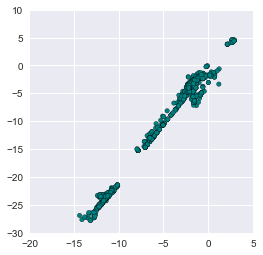

In [38]:
sns.set()

fig = plt.figure(figsize=[4,4])
means = (abs(pd.DataFrame(wtSamples).apply(np.mean,axis=1)))
varcs = (abs(pd.DataFrame(wtSamples).apply(np.var,axis=1)))
plt.scatter(np.log10(means),np.log10(varcs),edgecolor='black',facecolor='teal')
#(pd.DataFrame(wtSamples).apply(np.mean,axis=1))

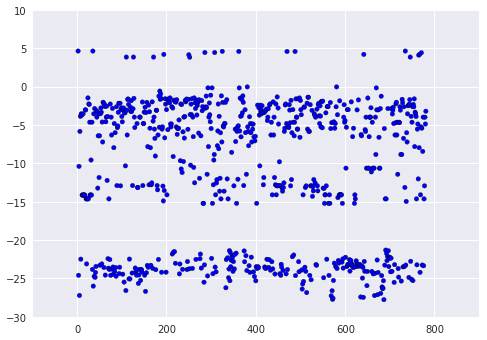

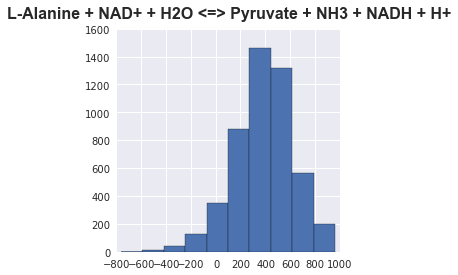

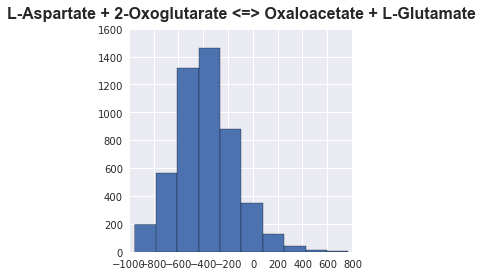

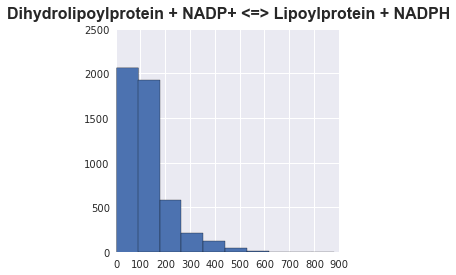

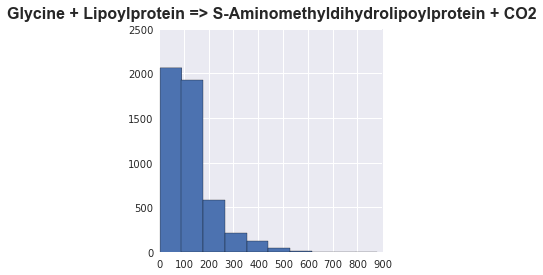

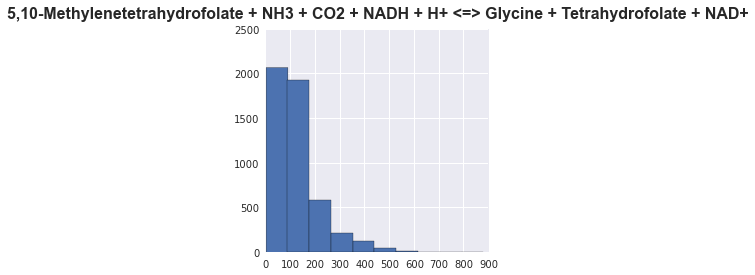

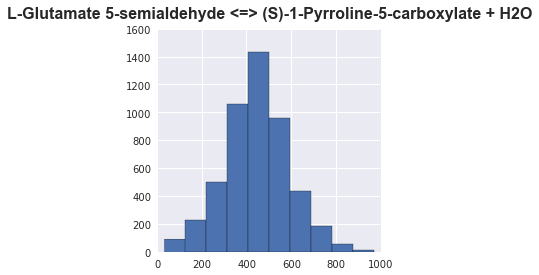

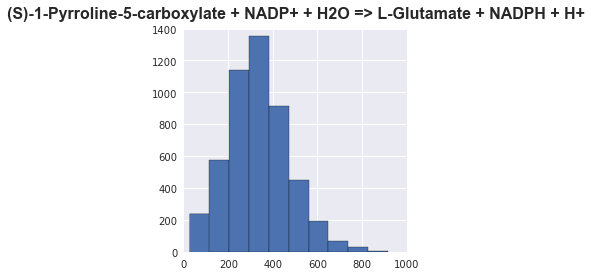

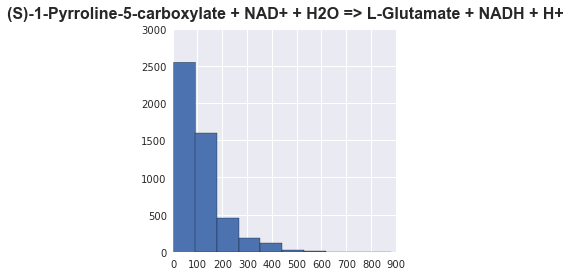

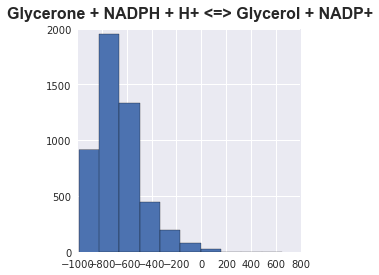

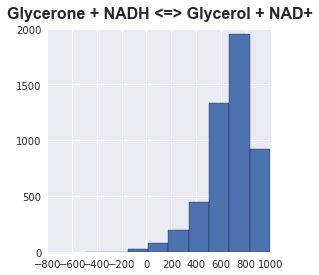

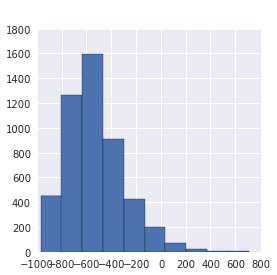

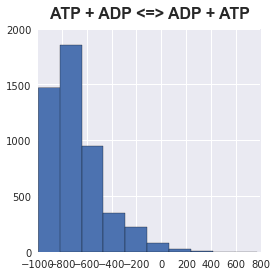

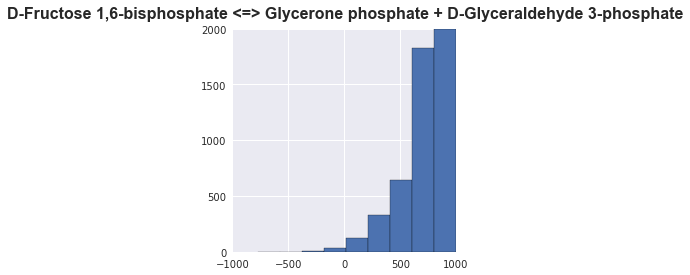

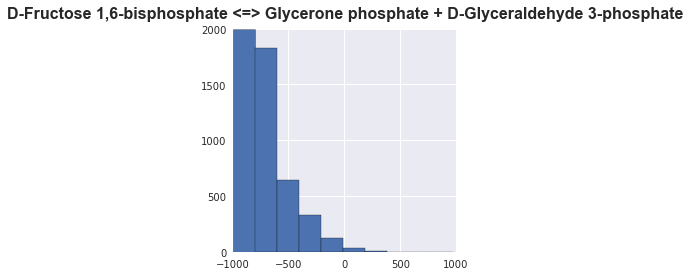

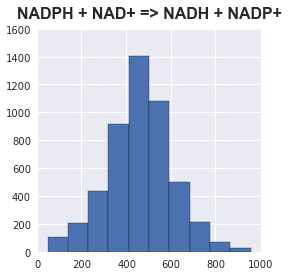

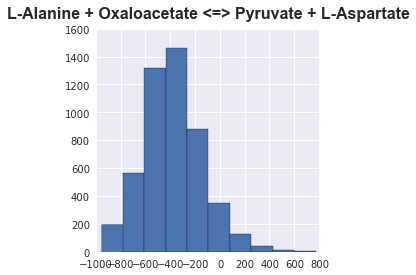

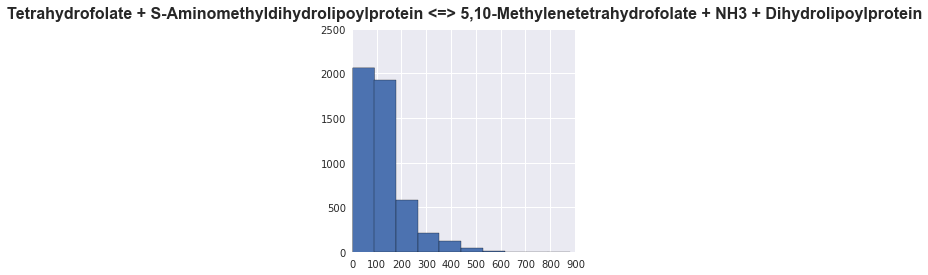

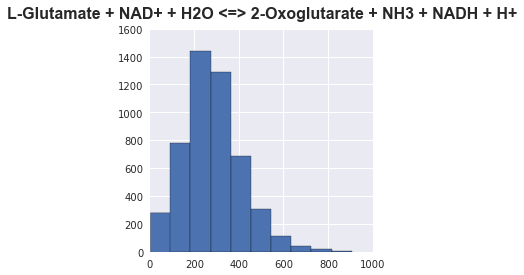

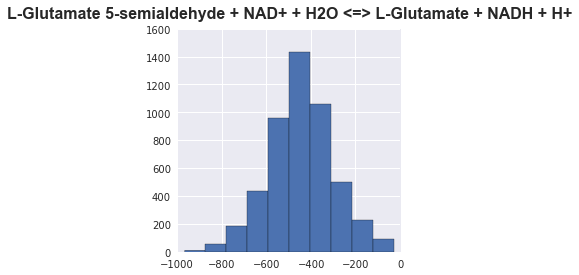

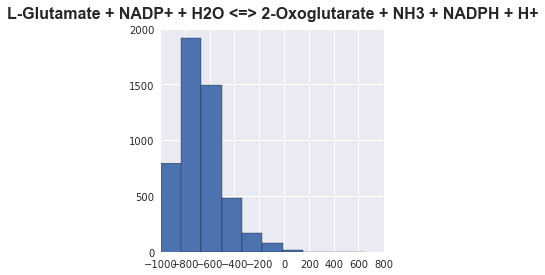

In [239]:
plt.scatter(range(780),np.log10(pd.DataFrame(wtSamples[0:780,:]).apply(np.var,axis=1)))
top_var_rxns     = np.where(np.log10(pd.DataFrame(wtSamples[0:780,:]).apply(np.var,axis=1))>1)[0]
top_var_rnxs_ids = [rxns.iloc[rr,0].rstrip() for rr in top_var_rxns]
top_var_rnxs_ids
halos.loc[top_var_rnxs_ids[0:4]]

for i in range(len(top_var_rxns)):
    fig = plt.figure(figsize=[4,4])
    plt.hist(Samples[top_var_rxns[i]])
    plt.title(halos.loc[top_var_rnxs_ids[i],'reaction_using_names']+'\n',fontsize=16,fontweight='bold')



In [241]:
Samples = wtSamples[0:780,2000:]

(780, 780) (780,) (3000, 3000)


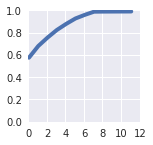

In [254]:
U,S,V = np.linalg.svd((Samples));
var_exp,num_pcs = summ_S(S)
top_pcs         = S[0:num_pcs];
rU  = varimax(U[:,0:num_pcs*2]);
fig = plt.figure(figsize=[2,2])
plt.plot(var_exp[0:num_pcs*2],lw=4); plt.ylim([0,1])
print U.shape, S.shape, V.shape

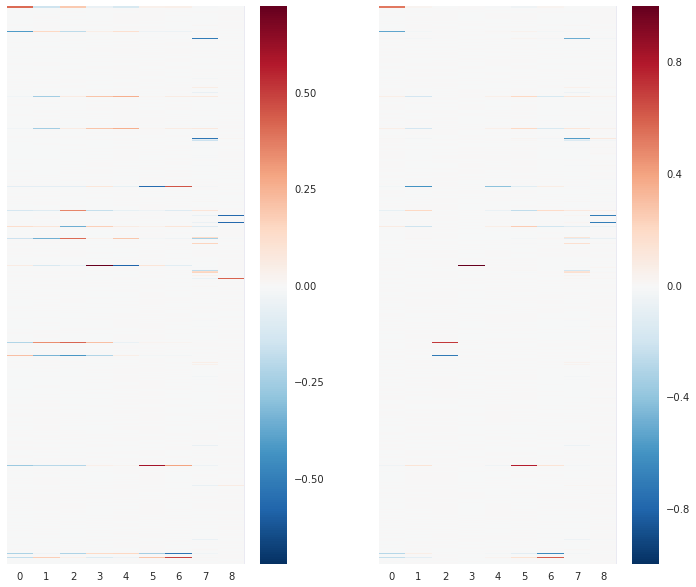

In [252]:
import seaborn as sns
sns.set()

fig, axs = plt.subplots(1,2, figsize=(12,10), facecolor='w', edgecolor='k')#,sharex='column')
fig.subplots_adjust(hspace = .15, wspace=0.25)

sns.heatmap( U[:,1:10],ax=axs[0])
sns.heatmap(rU[:,1:10],ax=axs[1])

for i in range(len(axs)):
    axs[0].set_yticks([])
    axs[1].set_yticks([])



['R01039', 'R01034', 'ER00025']
['Glycerol:NADP+ 2-oxidoreductase' 'Glycerol:NAD+ oxidoreductase'
 'H+ uptake']
['Glycerone + NADPH + H+ <=> Glycerol + NADP+'
 'Glycerone + NADH <=> Glycerol + NAD+' '']
['R00396', 'R00355', 'R00258', 'R00243']
['L-Alanine:NAD+ oxidoreductase (deaminating)'
 'L-Aspartate:2-oxoglutarate aminotransferase'
 'L-Alanine:2-oxoglutarate aminotransferase'
 'L-Glutamate:NAD+ oxidoreductase (deaminating)']
['L-Alanine + NAD+ + H2O <=> Pyruvate + NH3 + NADH + H+'
 'L-Aspartate + 2-Oxoglutarate <=> Oxaloacetate + L-Glutamate'
 'L-Alanine + Oxaloacetate <=> Pyruvate + L-Aspartate'
 'L-Glutamate + NAD+ + H2O <=> 2-Oxoglutarate + NH3 + NADH + H+']
['R00708', 'R00707']
['L-1-Pyrroline-5-carboxylate:NAD+ oxidoreductase'
 'L-1-Pyrroline-5-carboxylate:NAD+ oxidoreductase']
['(S)-1-Pyrroline-5-carboxylate + NADP+ + H2O => L-Glutamate + NADPH + H+'
 '(S)-1-Pyrroline-5-carboxylate + NAD+ + H2O => L-Glutamate + NADH + H+']
['R01070', 'R01068']
['beta-D-Fructose 1,6-bisphospha

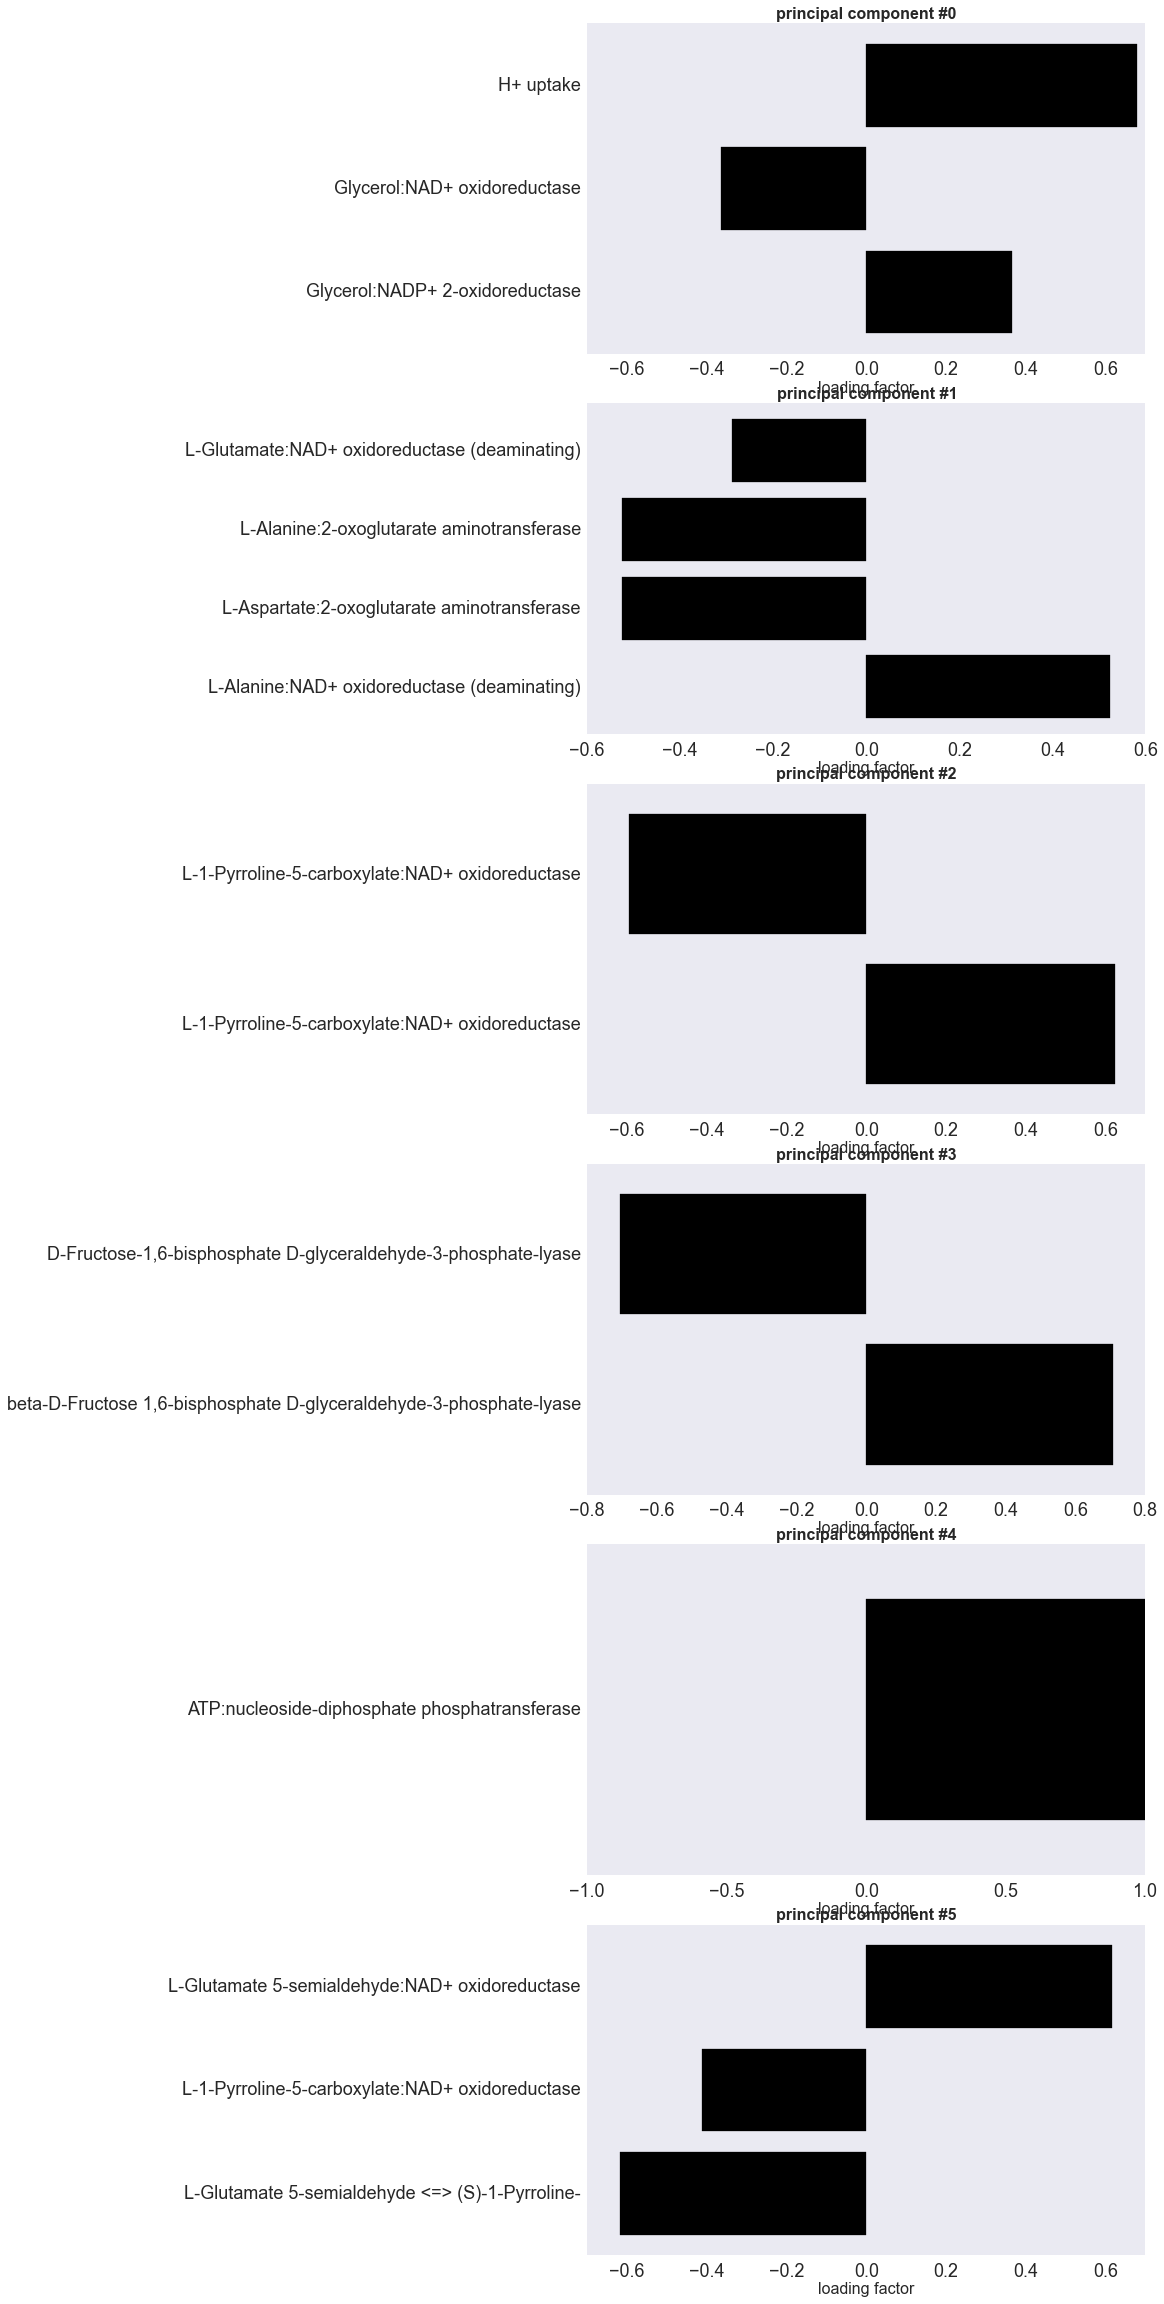

In [255]:
fig, axs = plt.subplots(6,1, figsize=(10,50), facecolor='w', edgecolor='k')#,sharex='column')
fig.subplots_adjust(hspace = .15, wspace=0.25)

axs = axs.ravel()

for i in range(len(top_pcs)): 
        max_loading= np.max(abs(rU[:,i]));
        toplot     = np.where(abs(rU[:,i])>0.5*max_loading)[0]
        U_subset   = rU[toplot,i]
        top_var_rxns_ids = [rxns.iloc[rr,0].rstrip() for rr in toplot]
        shortnames = np.array([halos.loc[j,"name"] for j in top_var_rxns_ids])
        longnames  = np.array([halos.loc[j,"reaction_using_names"] for j in top_var_rxns_ids])
        shortnames[np.where(shortnames=='')[0]]=longnames[np.where(shortnames=='')[0]]
        
        print top_var_rxns_ids
        print shortnames
        print np.array([halos.loc[j,"reaction_using_names"] for j in top_var_rxns_ids])
        
        axs[i].barh(range(U_subset.shape[0]),U_subset,color='black',height=0.8)
        axs[i].set_title('principal component #'+str(i),fontsize=16,fontweight='bold')
        axs[i].set_xlabel('loading factor',fontsize=16)
        axs[i].tick_params(axis='x',labelsize=18)
        axs[i].tick_params(axis='y',labelsize=18)
        
        labels = [item.get_text() for item in axs[i].get_xticklabels()]
        bound = math.ceil(np.max(abs(U_subset))*10)*0.1
        axs[i].set_yticks([0.4+ww for ww in range(U_subset.shape[0])])#,rotation=90)
        axs[i].set_yticklabels(shortnames,rotation=0)
        axs[i].grid()
        axs[i].set_xlim([-1*bound,bound])
        axs[i].set_ylim([-0.2,U_subset.shape[0]])

In [259]:
koSamples = koSamples[0:780,:];

(780, 780) (780,) (5000, 5000)


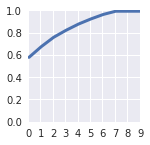

In [256]:
U,S,V = np.linalg.svd(koSamples);
var_exp,num_pcs = summ_S(S)
top_pcs         = S[0:num_pcs];
rU  = varimax(U[:,0:num_pcs*2]);
fig = plt.figure(figsize=[2,2])
plt.plot(var_exp[0:10],lw=3); plt.ylim([0,1])
print U.shape, S.shape, V.shape

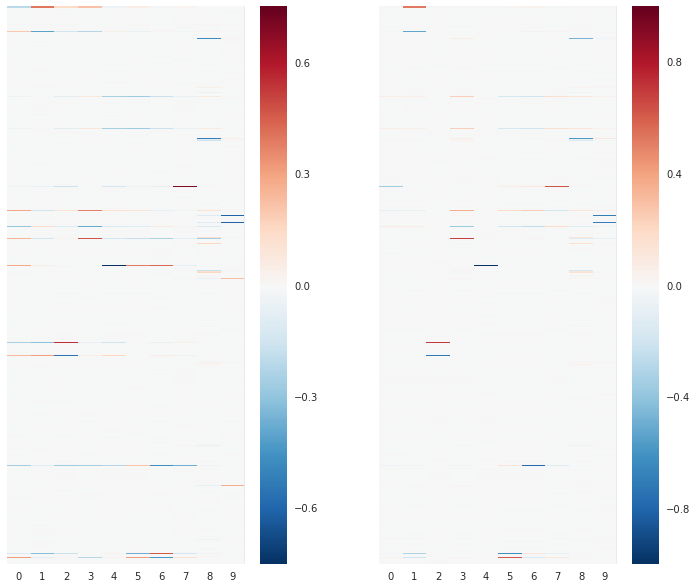

In [257]:
import seaborn as sns
sns.set()

fig, axs = plt.subplots(1,2, figsize=(12,10), facecolor='w', edgecolor='k')#,sharex='column')
fig.subplots_adjust(hspace = .15, wspace=0.25)

sns.heatmap( U[:,0:10],ax=axs[0])
sns.heatmap(rU[:,0:10],ax=axs[1])

for i in range(len(axs)):
    axs[0].set_yticks([])
    axs[1].set_yticks([])


['R03815', 'R03425', 'R01221', 'R03314', 'R00708', 'R00707', 'R01039', 'R01034', 'R04125', 'R00245']
['Dihydrolipoylprotein:NADP+ oxidoreductase'
 'Glycine:lipoylprotein oxidoreductase (decarboxylating and acceptor-aminomethylating)'
 'glycine synthase'
 'L-Glutamate 5-semialdehyde <=> (S)-1-Pyrroline-5-carboxylate + H2O'
 'L-1-Pyrroline-5-carboxylate:NAD+ oxidoreductase'
 'L-1-Pyrroline-5-carboxylate:NAD+ oxidoreductase'
 'Glycerol:NADP+ 2-oxidoreductase' 'Glycerol:NAD+ oxidoreductase'
 'S-Aminomethyldihydrolipoylprotein:(6S)-tetrahydrofolate aminomethyltransfe rase (ammonia-forming)'
 'L-Glutamate 5-semialdehyde:NAD+ oxidoreductase']
['Dihydrolipoylprotein + NADP+ <=> Lipoylprotein + NADPH'
 'Glycine + Lipoylprotein => S-Aminomethyldihydrolipoylprotein + CO2'
 '5,10-Methylenetetrahydrofolate + NH3 + CO2 + NADH + H+ <=> Glycine + Tetrahydrofolate + NAD+'
 'L-Glutamate 5-semialdehyde <=> (S)-1-Pyrroline-5-carboxylate + H2O'
 '(S)-1-Pyrroline-5-carboxylate + NADP+ + H2O => L-Glutamate +

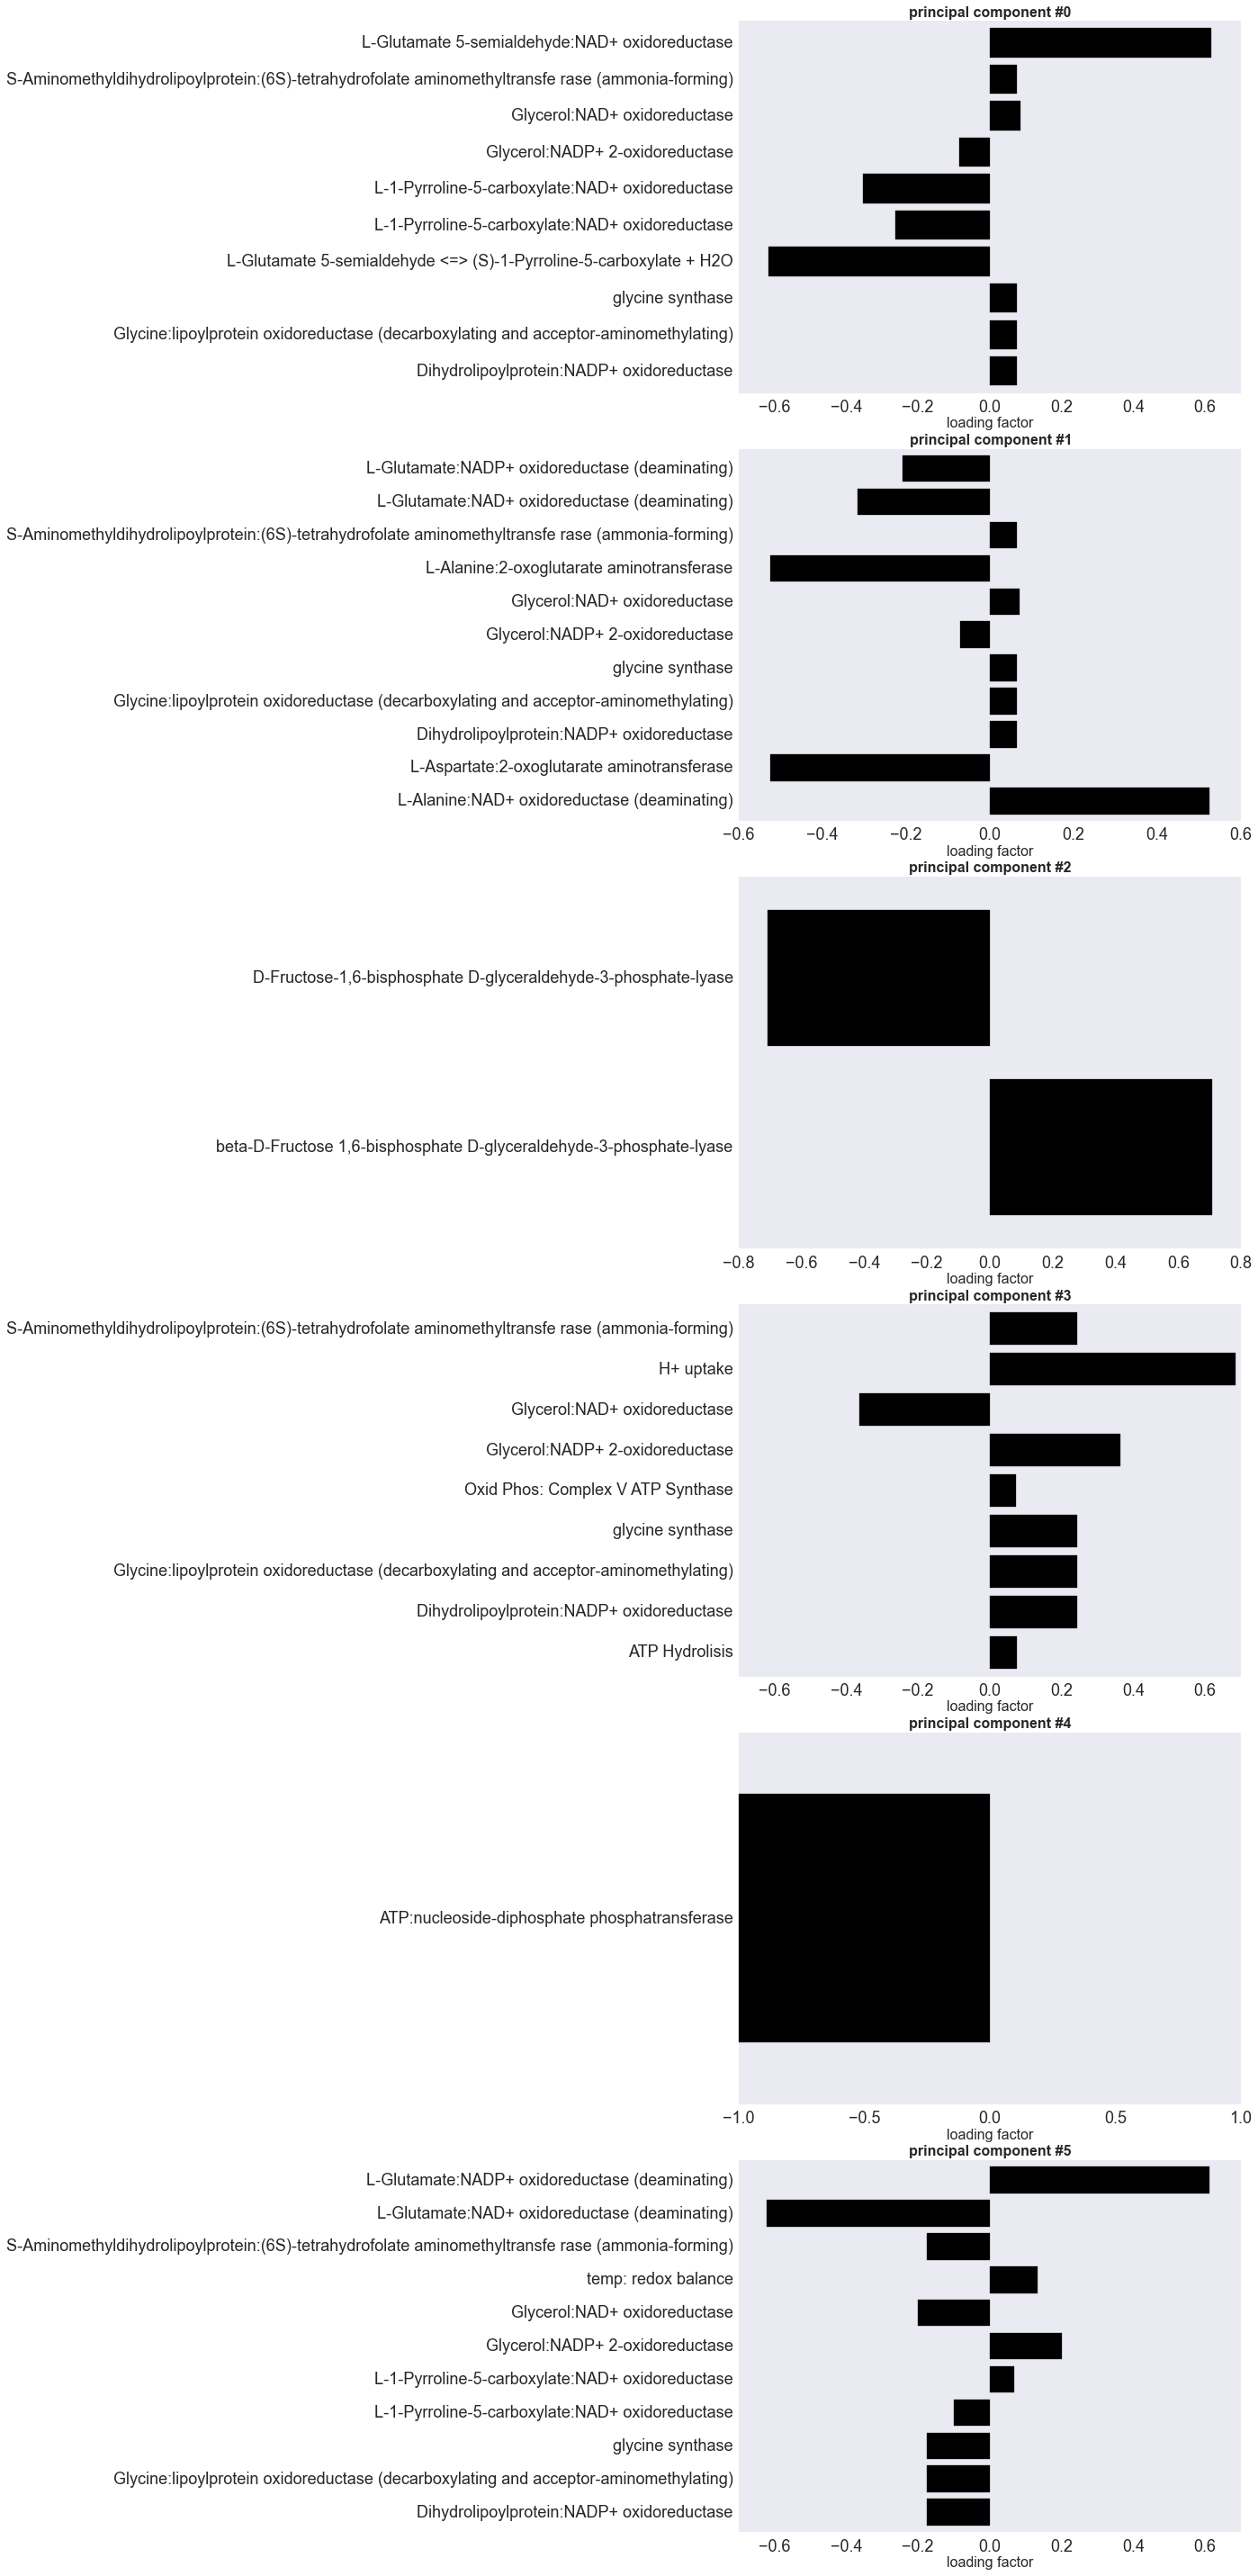

In [260]:
fig, axs = plt.subplots(6,1, figsize=(10,50), facecolor='w', edgecolor='k')#,sharex='column')
fig.subplots_adjust(hspace = .15, wspace=0.25)

axs = axs.ravel()

for i in range(len(top_pcs)): 
        max_loading= np.max(abs(rU[:,i]));
        toplot     = np.where(abs(rU[:,i])>0.10*max_loading)[0]
        U_subset   = rU[toplot,i]
        top_var_rxns_ids = [rxns.iloc[rr,0].rstrip() for rr in toplot]
        shortnames = np.array([halos.loc[j,"name"] for j in top_var_rxns_ids])
        longnames  = np.array([halos.loc[j,"reaction_using_names"] for j in top_var_rxns_ids])
        shortnames[np.where(shortnames=='')[0]]=longnames[np.where(shortnames=='')[0]]
        
        print top_var_rxns_ids
        print shortnames
        print np.array([halos.loc[j,"reaction_using_names"] for j in top_var_rxns_ids])
        
        axs[i].barh(range(U_subset.shape[0]),U_subset,color='black',height=0.8)
        axs[i].set_title('principal component #'+str(i),fontsize=16,fontweight='bold')
        axs[i].set_xlabel('loading factor',fontsize=16)
        axs[i].tick_params(axis='x',labelsize=18)
        axs[i].tick_params(axis='y',labelsize=18)
        
        labels = [item.get_text() for item in axs[i].get_xticklabels()]
        bound = math.ceil(np.max(abs(U_subset))*10)*0.1
        axs[i].set_yticks([0.4+ww for ww in range(U_subset.shape[0])])#,rotation=90)
        axs[i].set_yticklabels(shortnames,rotation=0)
        axs[i].grid()
        axs[i].set_xlim([-1*bound,bound])
        axs[i].set_ylim([-0.2,U_subset.shape[0]])

In [36]:
import seaborn as sns
sns.set()
wtSamples[660,:]

array([  1.40894714e-05,   1.74706366e-06,   1.26177012e-06, ...,
         8.12870769e-07,   1.90608529e-06,   1.27604641e-06])